
<figure><img src='images/assembly.gif' width="450" alt="Assembly wheelchair" style="float:left;margin: 0 0 0 3px;"/></figure>

# Modelagem de uma Cadeira de Rodas com Propulsão Manual Assistida

<br><br>
Erivelton Gualter dos Santos

### Escopo da Apresentação:

- Objetivo;
- Modelagem;
- Parâmetros;
- Estabilidade do Sistema;
- Simulação e Análise;
- Considerações Finais.

## Objetivo

### Mestrado

- Modelagem;
- Construção;
- Instrumentação;
- Controle;
- Comparação das Técnicas de Controle.

### PME501

- Modelagem e Simulação;

## Modelagem

- Sistema Estável (1 GDL)
- Sistema Instável (2 GDL)

### Modelo dinâmico com 1 Grau de Liberdade (a esquerda) e 2 Graus de Liberdade (a direita)
<br>
<figure><img src='images/Model.jpg' width="500" alt="" style="float:left;margin: 0 0 0 0px;"/></figure>


$ W_R $ e $ W_r $ : Força Normal nas Rodas Traseiras e Dianteiras.

$ W $ : Força Peso

$ \theta $ : Deslocamento Angular da Rodas

$ \phi $ : Deslocamento Angular da Cadeira de Rodas

$ R $ : Raio da Roda Traseira

$ R' $ : Raio do Aro de Propulsão (pushrim)


## Modelo Dinâmico com 1 Grau de Liberdade

<br><figure><img src='images/1GDL.jpg' width="350" alt="Assembly wheelchair" style="float:left;margin: 0 0 0 0px;"/></figure>


Através dos Teorema do Momento Angular e do Movimento Baricentro aplicado em cada corpo, temos a seguinte equação do movimento:

$$ F\left(\frac{R'}{R}\right) = \left( M + \frac{J_R}{R^2} \right) \dot{v} + F_R + F_r  $$


$ J_R $ é o momento de inercia

$ \ddot{\theta} $ é a aceleração angular

$ \tau_R $ é o momento gerado pela força resistiva ao  rolamento

$ \tau $ é o momento gerado pela força aplicada pelo usuário

$ R $ o raio da roda traseira. 







## Modelo Dinâmico com 2 Graus de Liberdade

<figure><img src='images/2GDL.jpg' width="350" alt="Assembly wheelchair" style="float:right;margin: 0 0 0 0px;"/></figure>


Através dos Teorema do Momento Angular e do Movimento Baricentro aplicado em cada corpo, temos a seguinte equação do movimento:

$$ 
\begin{bmatrix} 
J_R + (M_r + M_c)R^2 & M_cRlcos(\varphi) \\
M_cRlcos(\varphi) & J_c + M_cl^2 
\end{bmatrix}
\begin{bmatrix} 
\ddot\theta \\
\ddot\varphi
\end{bmatrix}
-
\begin{bmatrix} 
M_cRl(\dot\varphi)^2sin(\varphi) \\
M_cglsin(\varphi)
\end{bmatrix}
=
\begin{bmatrix} 
\tau - F_RR \\
-\tau
\end{bmatrix}
$$

Linearizando o sistema temos:

$$ 
\begin{bmatrix} 
J_R + (M_r + M_c)R^2 & M_cRl \\
M_cRl & J_c + M_cl^2 
\end{bmatrix}
\begin{bmatrix} 
\ddot\theta \\
\ddot\varphi
\end{bmatrix}
-
\begin{bmatrix} 
0 \\
M_cglsin(\varphi)
\end{bmatrix}
=
\begin{bmatrix} 
\tau - F_RR \\
-\tau
\end{bmatrix}
$$

$ J_R $ é o momento de inercia

$ \ddot{\theta} $ é a aceleração angular

$ \tau_R $ é o momento gerado pela força resistiva ao  rolamento

$ \tau $ é o momento gerado pela força aplicada pelo usuário

$ R $ o raio da roda traseira. 



## Transição entre o sistema estável para instável 

<br>
<figure><img src='images/Model_bloco.JPG' width="350" alt="" style="float:left; margin: 0 0 0 0px;"/></figure>

Para a eminência da transição, a força normal da roda dianteira deve ser nula, logo a aceleração neste instante corresponde a: 

$$ \dot{v} = \frac{L_Tg}{h_g} $$

Portanto, 


$$ F\left(\frac{R'}{R}\right) = \left( M + \frac{J_R}{R^2} \right) \frac{L_Tg}{h_g} + F_R + F_r  $$


# Parâmetros do Sistema


In [3]:
import scipy.io
from scipy.io import loadmat

data = {}
data.update(loadmat('data/data_torque.mat'))

X = data['X']
Y = data['Y']
torque_step = data['torque_step']


In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
cp = plt.contourf(X*100, Y, torque_step)
cbar = plt.colorbar(cp)
plt.title('Torque para empinar')
plt.xlabel('Distancia Longitudinal (cm)')
plt.ylabel('Altura do Usuario')
cbar.ax.set_ylabel('Escala de Torque em Nm')

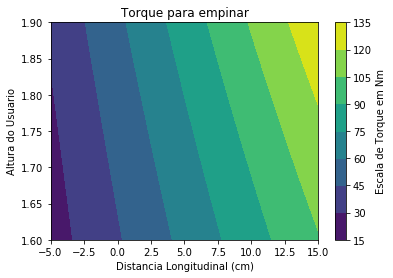

In [5]:

plt.show()

$$ F\left(\frac{R'}{R}\right) = \left( M + \frac{J_R}{R^2} \right) \frac{L_Tg}{h_g} + F_R + F_r  $$



In [18]:
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('max_colwidth', 100)
a = pd.read_csv('data/parameters.txt', sep=',')

display(Latex('Valores obtidos experimentalmente da Cadeira de Rodas Jaguaribe (Ortopedia Jaguaribe Industria e Comercio)'))
display(a)

<IPython.core.display.Latex object>

,Propriedades,Valores
0,Massa Total,87.700
1,Massa da Cadeira de Rodas,12.700
2,Massa da Roda Traseira,2.540
3,Momento Angular da Roda Traseira,0.140
4,Momento Angular da Cadeira de Rodas,1.670
5,Raio da Roda Traseira,0.305
6,Distancia horizontal do CG,0.107
7,Distancia vertical do CG,0.436
